In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

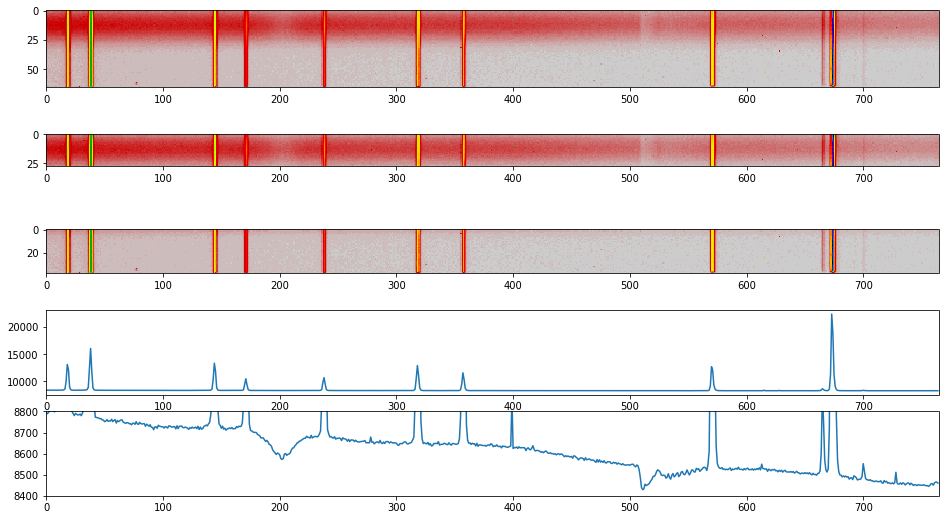

In [2]:
refstar = fits.open('../data/spec_refstar_2min.FIT')
flat = fits.open('../data/flat_30s.00000000.FLAT.FIT')

data = refstar[0].data

fig, axs = plt.subplots(5, 1, figsize=(16, 9))
axs[0].imshow(data[22:88][:], cmap='nipy_spectral_r')         # 50 mm slit
axs[1].imshow(data[22:50][:], cmap='nipy_spectral_r')         # Referenace star spectrum
axs[2].imshow(data[50:88][:], cmap='nipy_spectral_r')         # arclamp spectrum

avg_arclamp = np.mean(data[50:88], axis=0)                    # Average the arclamp portion of data
axs[3].plot(avg_arclamp)                                      # Plot
axs[3].set_xlim(axs[2].get_xlim())                            # Have wavelenght plot line up with image

avg_refstar = np.mean(data[22:50], axis=0)                    # Average the refstar portion
axs[4].plot(avg_refstar)
axs[4].set_xlim(axs[0].get_xlim())                            # Have wavelength plot line up with image
axs[4].set_ylim(8400, 8800)

refstar.close()
flat.close()
plt.show()

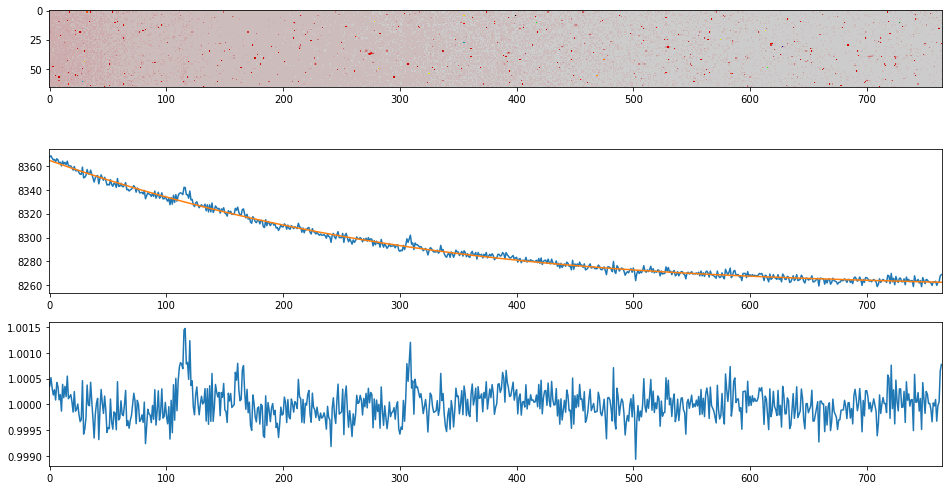

In [46]:
ngc891 = fits.open('../good_data/bulge_ngc891.00000001.FIT')

data = ngc891[0].data
avg_ngc891_slit1 = np.median(data[26:92], axis=0)

fitslit1 = np.poly1d(np.polyfit(np.arange(1, 766), avg_ngc891_slit1, 3))

fig, axs = plt.subplots(3, 1, figsize=(16, 9))
axs[0].imshow(np.log10(data[26:92][:]), cmap='nipy_spectral_r')         # 50 mm slit
axs[1].plot(avg_ngc891_slit1)
axs[1].plot(fitslit1(np.arange(1, 766)))
axs[1].set_xlim(axs[0].get_xlim())
axs[2].plot(avg_ngc891_slit1/fitslit1(np.arange(1, 766)))
axs[2].set_xlim(axs[0].get_xlim())

ngc891.close()
plt.show()

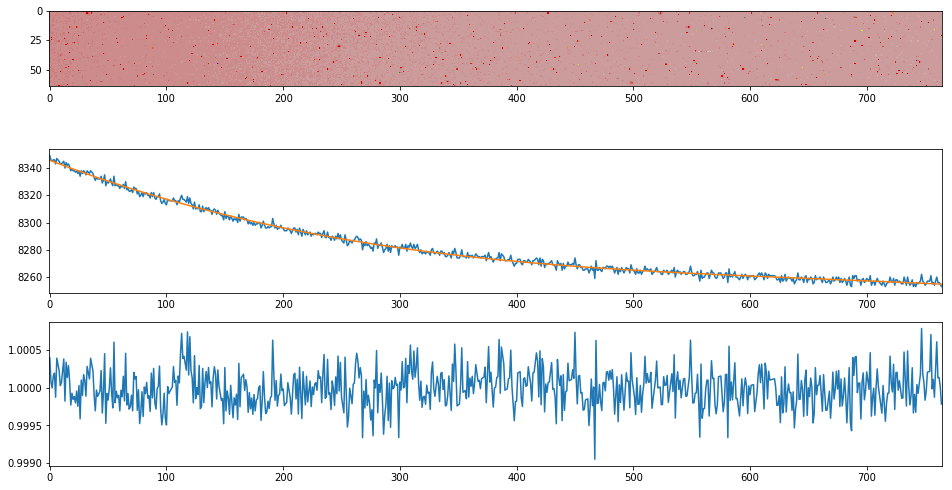

In [47]:
data = ngc891[0].data
avg_ngc891_slit2 = np.median(data[111:176], axis=0)

fitslit2 = np.poly1d(np.polyfit(np.arange(1, 766), avg_ngc891_slit2, 3))

fig, axs = plt.subplots(3, 1, figsize=(16, 9))
axs[0].imshow(np.log(np.log(data[111:176][:])), cmap='nipy_spectral_r')         # 50 mm slit
axs[1].plot(avg_ngc891_slit2)
axs[1].plot(fitslit2(np.arange(1, 766)))
axs[1].set_xlim(axs[0].get_xlim())
axs[2].plot(avg_ngc891_slit2/fitslit2(np.arange(1, 766)))
axs[2].set_xlim(axs[0].get_xlim())

plt.show()